<a href="https://colab.research.google.com/github/lavish315/topic_modelling/blob/main/Topic_Modeling_on_News_Articles__Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

## <b><u> Exploratory Data Analysis </u></b>


In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
import spacy
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pandas._libs.lib import maybe_indices_to_slice
import csv
import glob

vals = []
main_dataframe = pd.DataFrame()
final_df = pd.DataFrame()
path = '/content/drive/MyDrive/AlmaBetter/Data/Unsupervised machine learning/business'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('business')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)

path = '/content/drive/MyDrive/AlmaBetter/Data/Unsupervised machine learning/entertainment'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('entertainment')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)

path = '/content/drive/MyDrive/AlmaBetter/Data/Unsupervised machine learning/politics'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('politics')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)

path = '/content/drive/MyDrive/AlmaBetter/Data/Unsupervised machine learning/sport'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('sport')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)

path = '/content/drive/MyDrive/AlmaBetter/Data/Unsupervised machine learning/tech'

files = glob.glob(path + '/*.txt')

for i in files:
  df1 = pd.read_csv(i, sep="/n",on_bad_lines='skip',encoding= 'unicode_escape')
  vals.append('tech')
  main_dataframe = pd.concat([main_dataframe, df1], axis = 1)
main_dataframe_transposed = main_dataframe.T
main_dataframe_copy = main_dataframe_transposed
main_dataframe_copy = main_dataframe_copy.reset_index()

final_df[0] = main_dataframe_copy['index'].values
main_dataframe_copy = main_dataframe_copy.iloc[: , 1:]
main_dataframe_copy['new'] = main_dataframe_copy.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
final_df[1]= main_dataframe_copy['new'].values
final_df[2]=vals

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
final_df=final_df.drop_duplicates()


In [5]:
final_df[2].value_counts(normalize=True)*100

business         23.670588
sport            23.670588
politics         18.964706
entertainment    17.364706
tech             16.329412
Name: 2, dtype: float64

In [6]:
final_df[1] = final_df[1].astype('str') 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
# Removing numbers
def remove_numbers(text):
	number_pattern = r'\d+'
	without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
	return without_number

In [8]:
import re
final_df[1]=final_df[1].apply(remove_numbers)


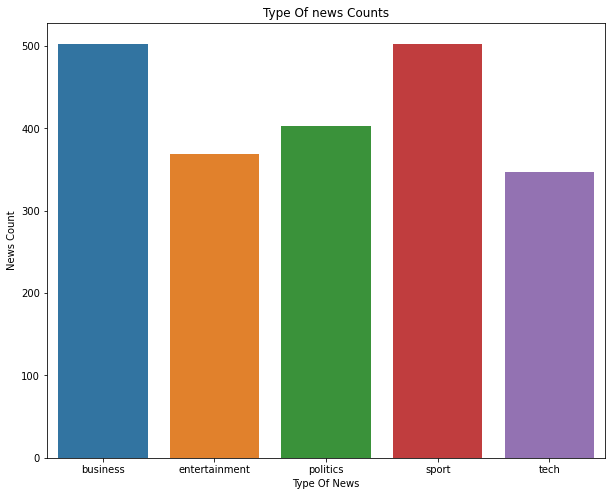

In [9]:
import warnings 
plt.figure(figsize=(10,8))
warnings.filterwarnings("ignore")
sb.countplot(final_df[2], data=final_df)
plt.xlabel("Type Of News")
plt.ylabel("News Count")
plt.title("Type Of news Counts")
plt.show()

In [10]:

final_df[3]=final_df[2]
print(final_df)
print(final_df.shape)
iter_val=0
for i in range(len(final_df)):
  if(final_df.iloc[i,2]=='business'):
    if(iter_val<2):
      final_df.iloc[i,3]='business_test'
      iter_val=iter_val+1

                                      0  \
0     Yukos unit buyer faces loan claim   
1     Ad sales boost Time Warner profit   
2      Dollar gains on Greenspan speech   
3      US trade gap hits record in 2004   
4     High fuel prices hit BA's profits   
...                                 ...   
2219    Net fingerprints combat attacks   
2220   BT program to beat dialler scams   
2221    Bad e-mail habits sustains spam   
2222  Microsoft plans 'safer ID' system   
2224   Beckham virus spotted on the net   

                                                      1         2         3  
0     The owners of embattled Russian oil giant Yuko...  business  business  
1     Quarterly profits at US media giant TimeWarner...  business  business  
2     The dollar has hit its highest level against t...  business  business  
3     The gap between US exports and imports hit an ...  business  business  
4     British Airways has blamed high fuel prices fo...  business  business  
...            

In [11]:
iter_val=0
for i in range(len(final_df)):
  # print(final_df.iloc[i,])
  if(final_df.iloc[i,2]=='entertainment'):
    if(iter_val<2):
      final_df.iloc[i,3]='entertainment_test'
      iter_val=iter_val+1
iter_val=0
for i in range(len(final_df)):
  # print(final_df.iloc[i,])
  if(final_df.iloc[i,2]=='politics'):
    if(iter_val<2):
      final_df.iloc[i,3]='politics_test'
      iter_val=iter_val+1
iter_val=0
for i in range(len(final_df)):
  # print(final_df.iloc[i,])
  if(final_df.iloc[i,2]=='sport'):
    if(iter_val<2):
      final_df.iloc[i,3]='sport_test'
      iter_val=iter_val+1
iter_val=0
for i in range(len(final_df)):
  # print(final_df.iloc[i,])
  if(final_df.iloc[i,2]=='tech'):
    if(iter_val<2):
      final_df.iloc[i,3]='tech_test'
      iter_val=iter_val+1
print(final_df.shape)

(2125, 4)


In [12]:
bt_df = pd.DataFrame()
bt_df = final_df[final_df[3] == 'business_test']
print(bt_df)

                                   0  \
0  Yukos unit buyer faces loan claim   
1  Ad sales boost Time Warner profit   

                                                   1         2              3  
0  The owners of embattled Russian oil giant Yuko...  business  business_test  
1  Quarterly profits at US media giant TimeWarner...  business  business_test  


In [13]:
final_df.drop(final_df.index[final_df[3] == 'business_test'], inplace=True)

In [14]:
et_df = pd.DataFrame()
et_df = final_df[final_df[3] == 'entertainment_test']
print(et_df)
final_df.drop(final_df.index[final_df[3] == 'entertainment_test'], inplace=True)

                                          0  \
510        Gallery unveils interactive tree   
511  Arthur Hailey: King of the bestsellers   

                                                     1              2  \
510  A Christmas tree that can receive text message...  entertainment   
511  Novelist Arthur Hailey, who has died at the ag...  entertainment   

                      3  
510  entertainment_test  
511  entertainment_test  


In [15]:
pt_df = pd.DataFrame()
pt_df = final_df[final_df[3] == 'politics_test']
print(pt_df)
final_df.drop(final_df.index[final_df[3] == 'politics_test'], inplace=True)

                                   0  \
896  Fox attacks Blair's Tory 'lies'   
897        Labour chooses Manchester   

                                                     1         2  \
896  Tony Blair lied when he took the UK to war so ...  politics   
897  The Labour Party will hold its   autumn confer...  politics   

                 3  
896  politics_test  
897  politics_test  


In [16]:
st_df = pd.DataFrame()
st_df = final_df[final_df[3] == 'sport_test']
print(st_df)
final_df.drop(final_df.index[final_df[3] == 'sport_test'], inplace=True)

                                      0  \
1313  Dibaba breaks 5,000m world record   
1314      2004: An Irish Athletics Year   

                                                      1      2           3  
1313  Ethiopia's Tirunesh Dibaba set a new world rec...  sport  sport_test  
1314    won't be remembered as one of Irish athletic...  sport  sport_test  


In [17]:
tt_df = pd.DataFrame()
tt_df = final_df[final_df[3] == 'tech_test']
print(tt_df)
final_df.drop(final_df.index[final_df[3] == 'tech_test'], inplace=True)

                                     0  \
1824  Microsoft seeking spyware trojan   
1825  Technology gets the creative bug   

                                                      1     2          3  
1824  Microsoft is investigating a trojan program th...  tech  tech_test  
1825  The hi-tech and the arts worlds have for some ...  tech  tech_test  


In [18]:
news_data = final_df[1]
bt_data = bt_df[1]

In [19]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

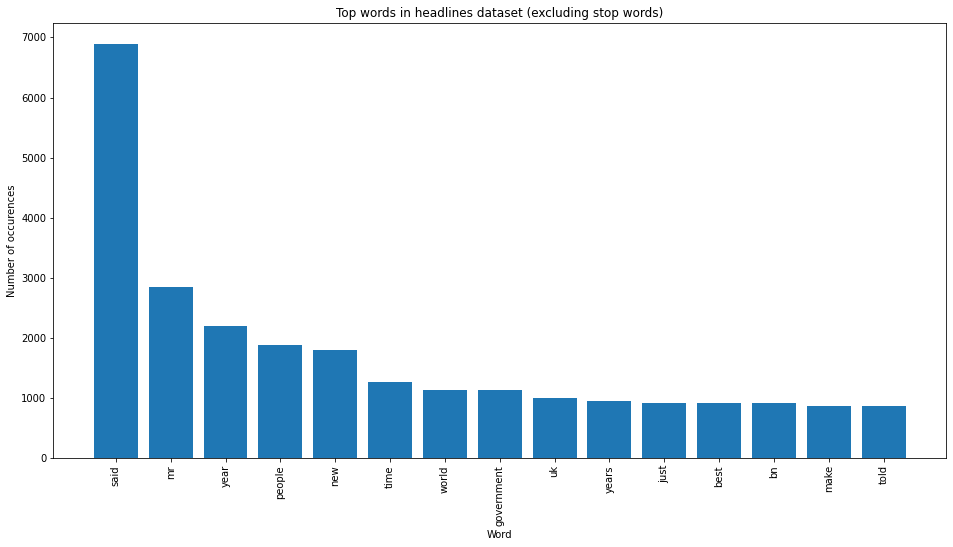

In [20]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=news_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

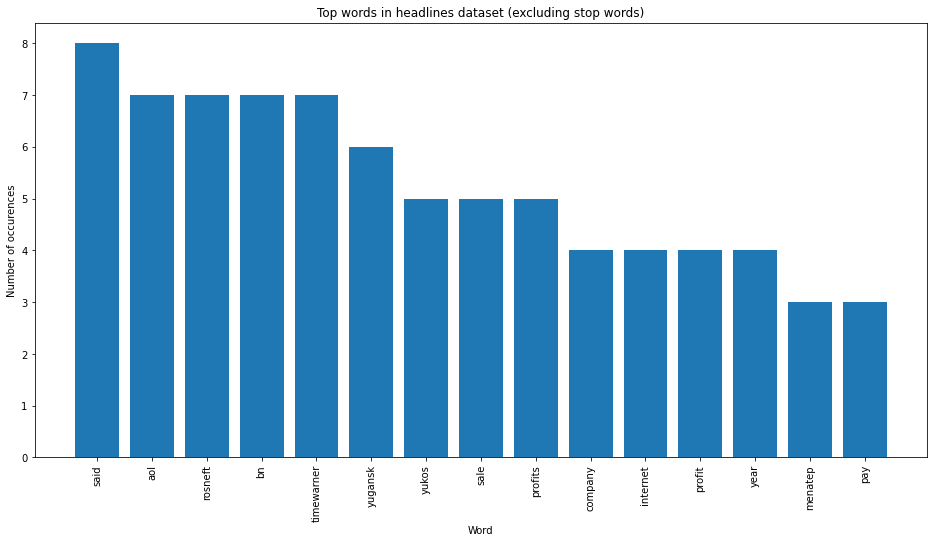

In [21]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=bt_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

### **Preprocessing**

In [22]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = text.translate(str.maketrans('', '', string.punctuation))
    # return the text stripped of punctuation marks
    return translator
 

In [23]:
news_data = news_data.apply(remove_punctuation)
news_data.head(10)

2     The dollar has hit its highest level against t...
3     The gap between US exports and imports hit an ...
4     British Airways has blamed high fuel prices fo...
5     India has raised the limit for foreign direct ...
6     A judge has dismissed an attempt by Russian oi...
7     Ask Jeeves has become the third leading online...
8     Indonesias government has confirmed it is cons...
9     The Daily and Sunday Telegraph newspapers are ...
10    Leisure group Rank could unveil plans to demer...
11    The number of people out of work in Europes la...
Name: 1, dtype: object

In [24]:
bt_data = bt_data.apply(remove_punctuation)
bt_data.head(10)

0    The owners of embattled Russian oil giant Yuko...
1    Quarterly profits at US media giant TimeWarner...
Name: 1, dtype: object

In [25]:
pt_data = pt_df[1]
pt_data = pt_data.apply(remove_punctuation)
pt_data.head(10)

896    Tony Blair lied when he took the UK to war so ...
897    The Labour Party will hold its   autumn confer...
Name: 1, dtype: object

In [26]:
st_data = st_df[1]
st_data = st_data.apply(remove_punctuation)
st_data.head(10)

1313    Ethiopias Tirunesh Dibaba set a new world reco...
1314      wont be remembered as one of Irish athletics...
Name: 1, dtype: object

In [27]:
et_data = et_df[1]
et_data = et_data.apply(remove_punctuation)
et_data.head(10)

510    A Christmas tree that can receive text message...
511    Novelist Arthur Hailey who has died at the age...
Name: 1, dtype: object

In [28]:
tt_data = tt_df[1]
tt_data = tt_data.apply(remove_punctuation)
tt_data.head(10)

1824    Microsoft is investigating a trojan program th...
1825    The hitech and the arts worlds have for some t...
Name: 1, dtype: object

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
# extracting the stopwords from nltk library
from nltk.corpus import stopwords

sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [31]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [32]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [33]:
news_data = news_data.apply(stopwords)
news_data.head(10)

2     dollar hit highest level euro almost three mon...
3     gap us exports imports hit alltime high bn â£ ...
4     british airways blamed high fuel prices drop p...
5     india raised limit foreign direct investment t...
6     judge dismissed attempt russian oil giant yuko...
7     ask jeeves become third leading online search ...
8     indonesias government confirmed considering ra...
9     daily sunday telegraph newspapers axing journa...
10    leisure group rank could unveil plans demerge ...
11    number people work europes largest economy ris...
Name: 1, dtype: object

In [34]:
bt_data = bt_data.apply(stopwords)

In [35]:
tt_data = tt_data.apply(stopwords)

In [36]:
et_data = et_data.apply(stopwords)

In [37]:
st_data = st_data.apply(stopwords)

In [38]:
pt_data = pt_data.apply(stopwords)

In [39]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(news_data)
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [40]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

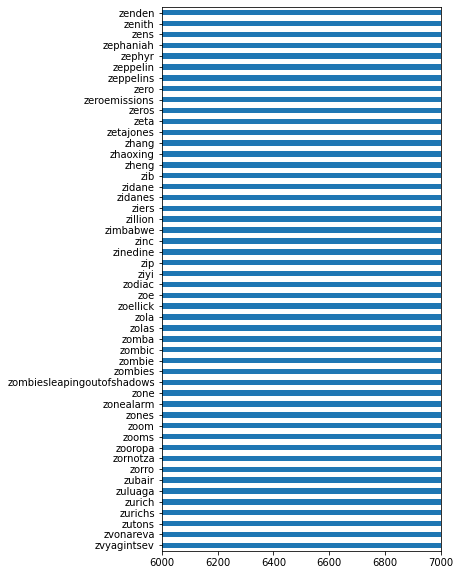

In [41]:
top_vacab = vocab_bef_stem.head(50)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (6000, 7000))

In [42]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [43]:
news_data = news_data.apply(stemming)
print(news_data)

2       dollar hit highest level euro almost three mon...
3       gap us export import hit alltim high bn â£ bn ...
4       british airway blame high fuel price drop prof...
5       india rais limit foreign direct invest telecom...
6       judg dismiss attempt russian oil giant yuko ga...
                              ...                        
2219    eighti larg net servic firm switch softwar spo...
2220    bt introduc two initi help beat rogu dialler s...
2221    bad behaviour email user help sustain spam ind...
2222    microsoft plan make window internet explor sec...
2224    virus writer trade interest david beckham dist...
Name: 1, Length: 2115, dtype: object


In [44]:
bt_data = bt_data.apply(stemming)
print(bt_data)

0    owner embattl russian oil giant yuko ask buyer...
1    quarter profit us media giant timewarn jump bn...
Name: 1, dtype: object


In [45]:
tt_data = tt_data.apply(stemming)
print(tt_data)

1824    microsoft investig trojan program attempt swit...
1825    hitech art world time danc around offer creati...
Name: 1, dtype: object


In [46]:
et_data = et_data.apply(stemming)
print(et_data)

510    christma tree receiv text messag unveil london...
511    novelist arthur hailey die age known bestsel p...
Name: 1, dtype: object


In [47]:
st_data = st_data.apply(stemming)
print(st_data)

1313    ethiopia tirunesh dibaba set new world record ...
1314    wont rememb one irish athlet great year year b...
Name: 1, dtype: object


In [48]:
pt_data = pt_data.apply(stemming)
print(pt_data)

896    toni blair lie took uk war qualm lie elect cam...
897    labour parti hold autumn confer manchest black...
Name: 1, dtype: object


In [49]:
# create the object of tfid vectorizer
# tfid_vectorizer = TfidfVectorizer("english")
tfid_vectorizer = TfidfVectorizer()
# fit the vectorizer using the text data
tfid_vectorizer.fit(news_data)

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

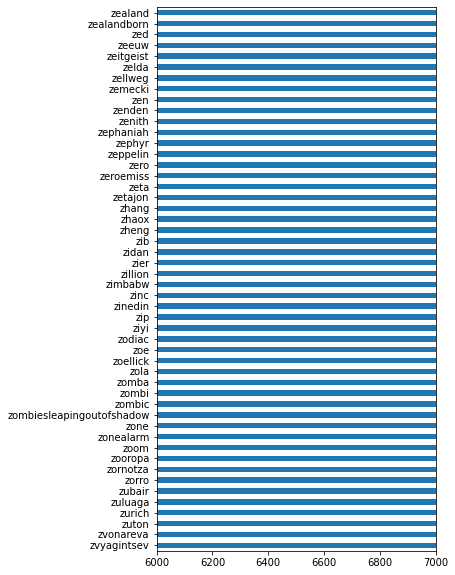

In [50]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(50)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (6000, 7000))

In [51]:
word_data=news_data.str.split().tolist()

In [52]:
word_data

[['dollar',
  'hit',
  'highest',
  'level',
  'euro',
  'almost',
  'three',
  'month',
  'feder',
  'reserv',
  'head',
  'said',
  'us',
  'trade',
  'deficit',
  'set',
  'stabilis',
  'alan',
  'greenspan',
  'highlight',
  'us',
  'govern',
  'willing',
  'curb',
  'spend',
  'rise',
  'household',
  'save',
  'factor',
  'may',
  'help',
  'reduc',
  'late',
  'trade',
  'new',
  'york',
  'dollar',
  'reach',
  'euro',
  'thursday',
  'market',
  'concern',
  'deficit',
  'hit',
  'greenback',
  'recent',
  'month',
  'friday',
  'feder',
  'reserv',
  'chairman',
  'mr',
  'greenspan',
  'speech',
  'london',
  'ahead',
  'meet',
  'g',
  'financ',
  'minist',
  'sent',
  'dollar',
  'higher',
  'earlier',
  'tumbl',
  'back',
  'worsethanexpect',
  'us',
  'job',
  'data',
  'think',
  'chairman',
  'take',
  'much',
  'sanguin',
  'view',
  'current',
  'account',
  'deficit',
  'hes',
  'taken',
  'time',
  'said',
  'robert',
  'sinch',
  'head',
  'currenc',
  'strategi',

In [53]:
import gensim

In [54]:
import nltk
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer, SnowballStemmer
# import nltk
# nltk.download('omw-1.4')
nltk.download('wordnet')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [55]:
processed_docs = []

for doc in news_data:
    processed_docs.append(preprocess(doc))

In [56]:
print(processed_docs[:2])


[['dollar', 'highest', 'level', 'euro', 'month', 'feder', 'reserv', 'head', 'say', 'trade', 'deficit', 'stabili', 'alan', 'greenspan', 'highlight', 'govern', 'will', 'curb', 'spend', 'rise', 'household', 'save', 'factor', 'help', 'reduc', 'late', 'trade', 'york', 'dollar', 'reach', 'euro', 'thursday', 'market', 'concern', 'deficit', 'greenback', 'recent', 'month', 'friday', 'feder', 'reserv', 'chairman', 'greenspan', 'speech', 'london', 'ahead', 'meet', 'financ', 'minist', 'send', 'dollar', 'higher', 'earlier', 'tumbl', 'worsethanexpect', 'data', 'think', 'chairman', 'sanguin', 'view', 'current', 'account', 'deficit', 'take', 'time', 'say', 'robert', 'sinch', 'head', 'currenc', 'strategi', 'bank', 'america', 'york', 'longerterm', 'view', 'condit', 'current', 'account', 'deficit', 'improv', 'year', 'worri', 'deficit', 'concern', 'china', 'howev', 'remain', 'china', 'currenc', 'remain', 'dollar', 'currenc', 'sharp', 'fall', 'recent', 'month', 'therefor', 'chin', 'export', 'price', 'high'

In [57]:
dictionary = gensim.corpora.Dictionary(processed_docs)


In [58]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)


In [59]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


### **LDA Model training**

In [60]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

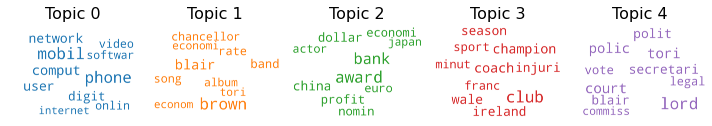

In [61]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [62]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.012*"mobil" + 0.012*"phone" + 0.009*"comput" + 0.008*"user" + 0.008*"network" + 0.007*"digit" + 0.006*"video" + 0.006*"onlin" + 0.006*"softwar" + 0.005*"internet"


Topic: 1 
Words: 0.012*"brown" + 0.009*"blair" + 0.007*"band" + 0.007*"rate" + 0.006*"song" + 0.006*"chancellor" + 0.006*"album" + 0.006*"economi" + 0.006*"tori" + 0.006*"econom"


Topic: 2 
Words: 0.011*"award" + 0.010*"bank" + 0.007*"china" + 0.006*"dollar" + 0.006*"profit" + 0.006*"economi" + 0.006*"nomin" + 0.006*"euro" + 0.006*"actor" + 0.005*"japan"


Topic: 3 
Words: 0.009*"club" + 0.006*"coach" + 0.006*"champion" + 0.006*"wale" + 0.006*"ireland" + 0.006*"season" + 0.006*"injuri" + 0.005*"sport" + 0.005*"franc" + 0.005*"minut"


Topic: 4 
Words: 0.009*"lord" + 0.007*"tori" + 0.007*"court" + 0.006*"polic" + 0.006*"secretari" + 0.006*"polit" + 0.005*"blair" + 0.005*"vote" + 0.005*"legal" + 0.004*"commiss"




**Classification of the topics
Using the words in each topic and their corresponding weights, the categories we can infer?**

0: Sports

1: Entertainment

2: Business

3: Politics

4: Tech

### **Testing model on unseen documents**

In [63]:
bow_vector = dictionary.doc2bow(preprocess(bt_data[1]))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.6280184388160706	 Topic: 0.011*"award" + 0.010*"bank" + 0.007*"china" + 0.006*"dollar" + 0.006*"profit"
Score: 0.3380837142467499	 Topic: 0.012*"mobil" + 0.012*"phone" + 0.009*"comput" + 0.008*"user" + 0.008*"network"
Score: 0.03010934591293335	 Topic: 0.009*"lord" + 0.007*"tori" + 0.007*"court" + 0.006*"polic" + 0.006*"secretari"


In [64]:
bow_vector = dictionary.doc2bow(preprocess(bt_data[0]))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.9885804057121277	 Topic: 0.011*"award" + 0.010*"bank" + 0.007*"china" + 0.006*"dollar" + 0.006*"profit"


In [65]:
bow_vector = dictionary.doc2bow(preprocess(et_data[510]))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.43676522374153137	 Topic: 0.012*"brown" + 0.009*"blair" + 0.007*"band" + 0.007*"rate" + 0.006*"song"
Score: 0.3523445427417755	 Topic: 0.012*"mobil" + 0.012*"phone" + 0.009*"comput" + 0.008*"user" + 0.008*"network"
Score: 0.14335986971855164	 Topic: 0.011*"award" + 0.010*"bank" + 0.007*"china" + 0.006*"dollar" + 0.006*"profit"
Score: 0.06228691339492798	 Topic: 0.009*"club" + 0.006*"coach" + 0.006*"champion" + 0.006*"wale" + 0.006*"ireland"


In [66]:
bow_vector = dictionary.doc2bow(preprocess(et_data[511]))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.41206106543540955	 Topic: 0.012*"brown" + 0.009*"blair" + 0.007*"band" + 0.007*"rate" + 0.006*"song"
Score: 0.24846678972244263	 Topic: 0.011*"award" + 0.010*"bank" + 0.007*"china" + 0.006*"dollar" + 0.006*"profit"
Score: 0.21791906654834747	 Topic: 0.012*"mobil" + 0.012*"phone" + 0.009*"comput" + 0.008*"user" + 0.008*"network"
Score: 0.12009258568286896	 Topic: 0.009*"lord" + 0.007*"tori" + 0.007*"court" + 0.006*"polic" + 0.006*"secretari"


In [67]:
print(st_data)

1313    ethiopia tirunesh dibaba set new world record ...
1314    wont rememb one irish athlet great year year b...
Name: 1, dtype: object
